<a href="https://colab.research.google.com/github/arthurfg/BackuPy/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X = cancer.data
y = cancer.target

Standarização

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1, stratify = y)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel= 'linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9912280701754386


Confusion Matrix


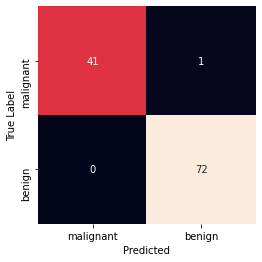

In [ ]:
print('Confusion Matrix')
mat= metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True, annot=True, fmt = 'd', cbar= False,
            xticklabels = cancer.target_names,
            yticklabels = cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

Kernel = poly

Accuracy:  0.9912280701754386
Confusion Matrix


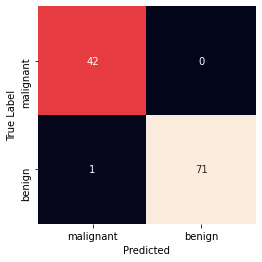

In [ ]:
clf = svm.SVC(kernel= 'poly', degree=1,gamma=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Confusion Matrix')
mat= metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True, annot=True, fmt = 'd', cbar= False,
            xticklabels = cancer.target_names,
            yticklabels = cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

 kernel = sigmoid

Accuracy:  0.8947368421052632
Confusion Matrix


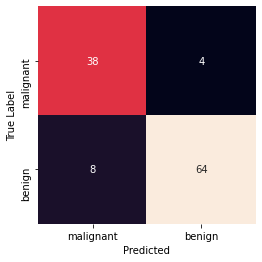

In [ ]:
clf = svm.SVC(kernel= 'sigmoid',gamma=200, C=10)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

print('Confusion Matrix')
mat= metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True, annot=True, fmt = 'd', cbar= False,
            xticklabels = cancer.target_names,
            yticklabels = cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [ ]:
cancer_df = pd.DataFrame(X, columns= cancer.feature_names)
cancer_df['result'] = y

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.result.value_counts()

1    357
0    212
Name: result, dtype: int64

In [ ]:
cancer_df.shape

(569, 31)